## Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/MiningProcess_Flotation_Plant_Database.csv")
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


## Convert Data Type

### Date to Datetime

Since some rows are sampled at every 20 seconds, and some are sampled at every minute, we will perform an increment of 20 seconds to the rows that are sampled at every hour. This will allow us to have a uniform time interval for all the rows.

In [3]:
# Convert the date column to datetime
df2 = df.copy()
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d %H:%M:%S')

In [4]:
# For the first row, the date is 2017-03-10 01:00:00, increment the date by 20 seconds for each row 
#df2['date'] = pd.date_range(start='2017-03-10 01:00:00', periods=len(df2), freq='20s')

In [5]:
df2.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"
737452,2017-09-09 23:00:00,"49,75","23,2","1164,12","468,019","384,801","9,61497","1,6531","300,355","292,865",...,"308,115","413,754","514,143","881,323","378,969","500,1","374,354","441,182","64,27","1,71"


### Other Columns to Float


In [6]:
# Set the date as the index
df2.set_index('date', inplace=True)

In [7]:
# Convert ',' to '.' and convert to float
for col in df2.columns:
    df2[col] = df2[col].str.replace(',', '.').astype(float)

df2.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


## Model Training with LightGBM

In [8]:
# Train lightgbm model to predict the % Silica Concentrate
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df2.drop(["% Iron Concentrate", "% Silica Concentrate"], axis=1)
y = df2['% Silica Concentrate']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5299
[LightGBM] [Info] Number of data points in the train set: 589962, number of used features: 21
[LightGBM] [Info] Start training from score 2.326936


/Users/amirashrafizham/Desktop/PythonApps/data-science-projects/mining-quality-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
print(f"RMSE without hyperparameter tuning: {rmse}")

RMSE without hyperparameter tuning: 0.7105201365528521


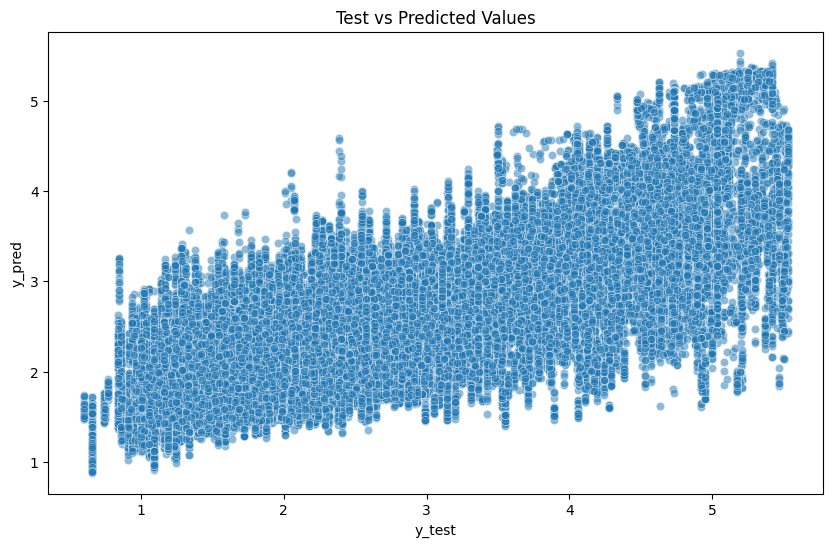

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the test and predicted values using scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Test vs Predicted Values')
plt.show()

## Hyperparameter Tuning using Optuna

In [11]:
import optuna


def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

/Users/amirashrafizham/Desktop/PythonApps/data-science-projects/mining-quality-prediction/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-03-11 23:08:20,642] A new study created in memory with name: no-name-cf84268e-769e-4bfb-9496-f485c2bd0fb3
/Users/amirashrafizham/Desktop/PythonApps/data-science-projects/mining-quality-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-03-11 23:10:05,227] Trial 0 finished with value: 0.2687637152460696 and parameters: {'learning_rate': 0.06639281808109848, 'num_leaves': 825, 'subsample': 0.5931143121191949, 'colsample_bytree': 0.357224

Best hyperparameters: {'learning_rate': 0.06639281808109848, 'num_leaves': 825, 'subsample': 0.5931143121191949, 'colsample_bytree': 0.35722499134147156, 'min_data_in_leaf': 8}
Best RMSE: 0.2687637152460696


In [12]:
# Train with the best hyperparameters
best_params = study.best_params

#best_params = {'learning_rate': 0.04789370740272594, 'num_leaves': 650, 'subsample': 0.5828415933146901, 'colsample_bytree': 0.8910869618475113, 'min_data_in_leaf': 72}

model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5299
[LightGBM] [Info] Number of data points in the train set: 589962, number of used features: 21
[LightGBM] [Info] Start training from score 2.326936
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8


/Users/amirashrafizham/Desktop/PythonApps/data-science-projects/mining-quality-prediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
print(f"RMSE with hyperparameter tuning: {rmse}")

RMSE with hyperparameter tuning: 0.38880120531979817


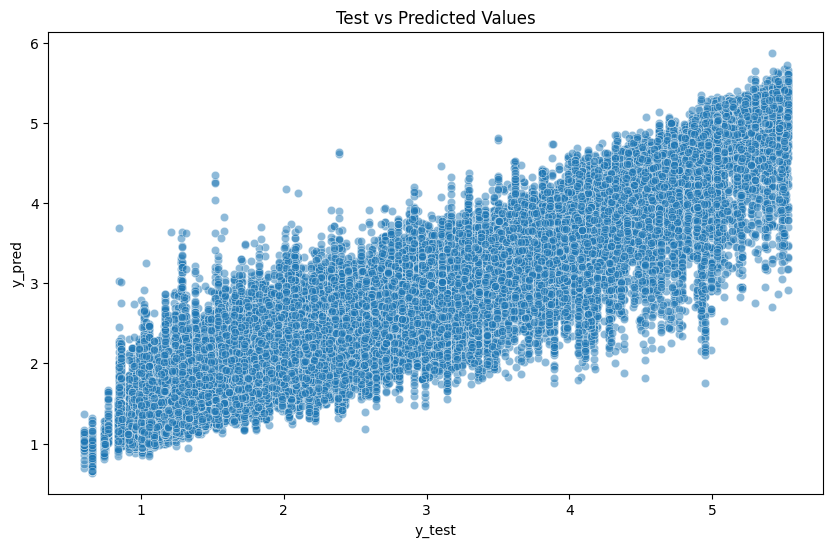

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the test and predicted values using scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Test vs Predicted Values")
plt.show()

Managed to improve the RMSE score from 0.71 to 0.38 by tuning the hyperparameters. Could have improved the score further by increasing the number of trials, but it would have taken a lot of time to run. Furthermore, by removing the learning rate and the number of estimators, the RMSE score could have improved further. 

## Model Explainability using SHAP

In [15]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

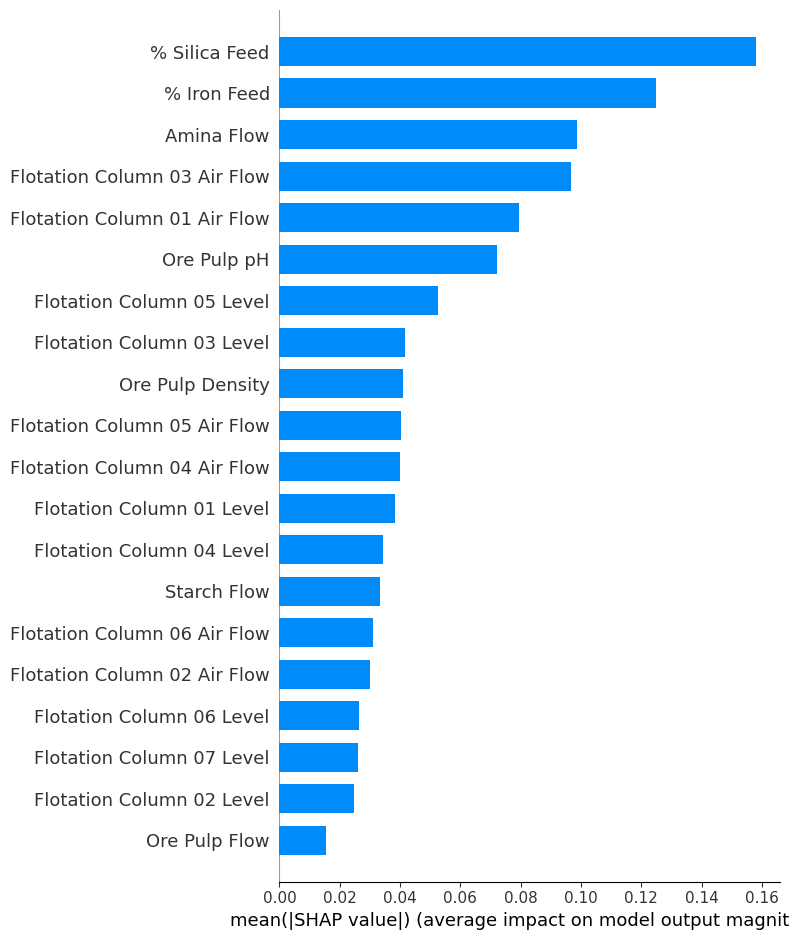

In [17]:
# Checking Feature Importance using SHAP
shap.summary_plot(shap_values, X_train, plot_type="bar")

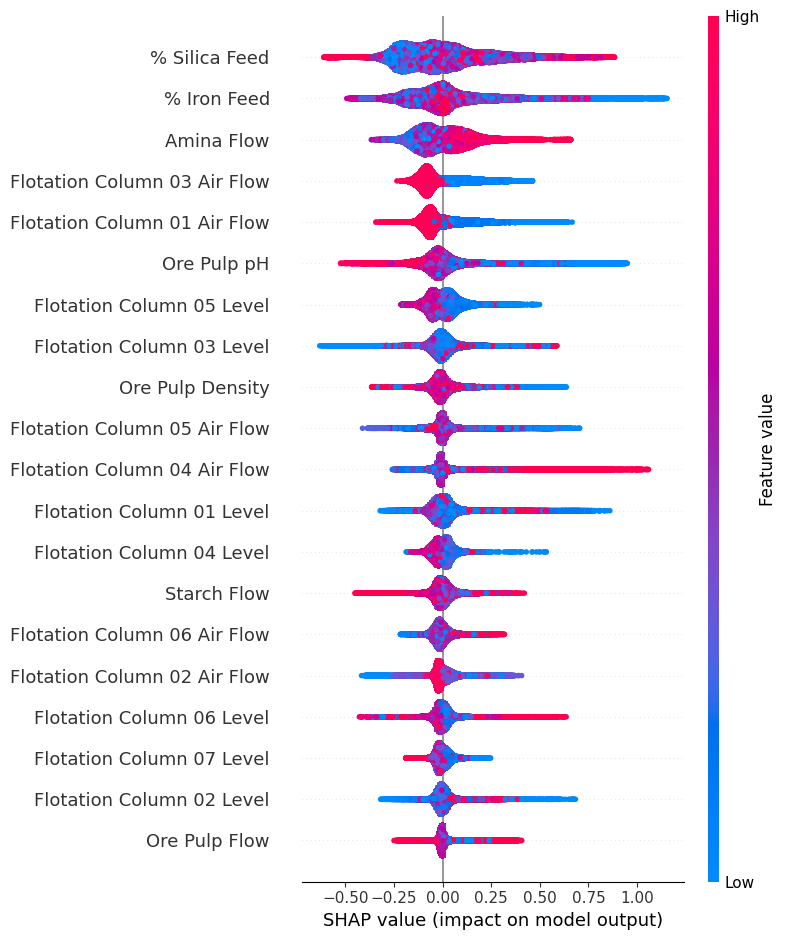

In [18]:
# Checking Magnitude of Features to the Model using SHAP
shap.summary_plot(shap_values, X_train)

Observation: Based on the SHAP plots shown above % Silica Feed and Amina Flow have the highest positive impact to the model in predicting the % Silica Concentrate. For optimization problem, we can maximize the % Silica Feed and Amina Flow to increase the % Silica Concentrate.